# Maximum likelihood estimation of Gumbel and GEV

In [1]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel

Start by generating some random data from the Gumbel distribution so we have something to work with

In [2]:
rv = stats.gumbel_r.rvs(loc=1,scale=1,size=1000)

In [3]:
import matplotlib.pyplot as plt

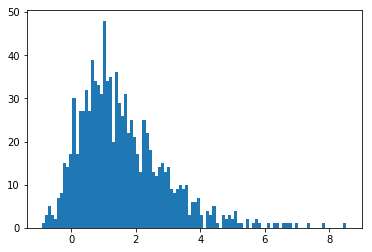

In [4]:
_=plt.hist(rv,bins=100)

```Statsmodels``` requires us to have a DataFrame with the data, so let us create one

In [5]:
import pandas as pd

In [6]:
df = pd.DataFrame()

The Endogeneous variable is the variable we wish to model

In [7]:
df['endog'] = rv

Let us also create a column for each of the parameters in the Gumbel model, i.e. $a$ and $b$

In [8]:
df['a'] = 1
df['b'] = 1

$a$ and $b$ will be the exogeneous variable

In [9]:
exog = df[['a','b']]
endog = df.endog

To find the maximum likelihood estimator using Statsmodels we can employ the ```GenericLikelihoodModel``` which has some limitations, but it at least works for Gumbel. The only thing we need to do is to generate the loglikelihood and Statsmodels does the rest

In [10]:
class MyGumbel(GenericLikelihoodModel):
    def loglike(self, params):
        #exog = self.exog
        endog = self.endog
        return stats.gumbel_r.logpdf(endog,loc=params[1],scale=params[0]).sum()

Create the model

In [11]:
gumbel_model = MyGumbel(endog, exog)

Fit the model

In [12]:
gumbel_model_fit = gumbel_model.fit()

Optimization terminated successfully.
         Current function value: 1.599611
         Iterations: 58
         Function evaluations: 111


In [13]:
gumbel_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               MyGumbel Results                               
==============================================================================
Dep. Variable:                  endog   Log-Likelihood:                -1599.6
Model:                       MyGumbel   AIC:                             3201.
Method:            Maximum Likelihood   BIC:                             3206.
Date:                Fri, 01 May 2020                                         
Time:                        15:11:32                                         
No. Observations:                1000                                         
Df Residuals:                     999                                         
Df Model:                           0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
a              1.0127      0.025     40.084      0.000       0.963       1.062
b              0.9770      0.034     29.007      0.000       0.911       1.043
==============================================================================
"""

In [14]:
stats.gumbel_r.fit(endog)[::-1]

(1.0126776355601301, 0.9769728606053696)

How did Statsmodels do this, well first of all the ML estimate is found by numerically solving the equations that we saw before in the lecture. Secondly they calculate the standard error using asymptotic normality of ML estimators, as I mentioned before. In the case of several parameters the variance of the estimator is the inverse of the hessian matrix (instead of $-1/l''$) 

In [15]:
variance = -np.linalg.inv(gumbel_model.hessian(stats.gumbel_r.fit(endog)[::-1]))
variance

array([[0.00063824, 0.0002636 ],
       [0.0002636 , 0.00113436]])

To get standard errors we take square root of each entry in the variance-covariance matrix

In [16]:
np.sqrt(variance)

array([[0.02526342, 0.01623575],
       [0.01623575, 0.03368031]])

We see that it perfectly fits what Statsmodels is doing. Let us now try to fit the GEV model

# The difficult GEV

In [25]:
rv = stats.genextreme.rvs(c=-0.1,loc=1,scale=1,size=1000)

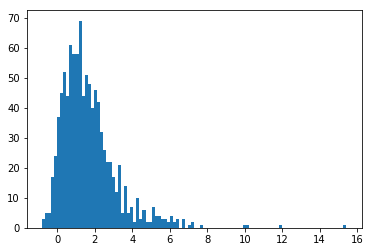

In [26]:
_=plt.hist(rv,bins=100)

In [27]:
df = pd.DataFrame()
df['endog'] = rv

In [28]:
df['a'] = 1
df['b'] = 1
df['c'] = 1

In [29]:
exog = df[['a','b','c']]
endog = df.endog

In [30]:
class MyGEV(GenericLikelihoodModel):
    def loglike(self, params):
        exog = self.exog
        endog = self.endog
        return stats.genextreme.logpdf(endog,c=params[2],loc=params[1],scale=params[0]).sum()

In [31]:
GEV_model = MyGEV(endog, exog)

In [39]:
GEV_model_fit = GEV_model.fit(maxiter=1000,start_params=[1,1,-0.1])

Optimization terminated successfully.
         Current function value: 1.637573
         Iterations: 38
         Function evaluations: 70


In [40]:
GEV_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                MyGEV Results                                 
==============================================================================
Dep. Variable:                  endog   Log-Likelihood:                -1637.6
Model:                          MyGEV   AIC:                             3277.
Method:            Maximum Likelihood   BIC:                             3282.
Date:                Fri, 01 May 2020                                         
Time:                        15:19:22                                         
No. Observations:                1000                                         
Df Residuals:                     999                                         
Df Model:                           0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
a              0.9984      0.027     37.306      0.000       0.946       1.051
b              0.9913      0.035     27.971      0.000       0.922       1.061
c             -0.1090      0.023     -4.702      0.000      -0.154      -0.064
==============================================================================
"""

In [41]:
params = stats.genextreme.fit(rv)
params

(-0.10900798833994779, 0.991274634318924, 0.9983569161217929)